In [ ]:
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


<h1><b> Importing Libraries</b> </h1>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, RocCurveDisplay, mean_squared_error, precision_score, precision_recall_curve, auc
from sklearn.model_selection import GridSearchCV

<h1><b> Load Dataset</b> </h1>

In [ ]:
file_path = "/content/gdrive/My Drive/HR-Employee-Attrition.csv"

df = pd.read_csv(file_path)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
print("Shape of dataset:", df.shape)
print("Columns:", df.columns.tolist())

Shape of dataset: (1470, 35)
Columns: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


<h1><b> Data Cleaning</b> </h1>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.isnull().sum()


,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


<h3>Drop irrelevant variables </h3>


In [ ]:
df.drop(["EmployeeCount","Over18","StandardHours","EmployeeNumber"], axis=1, inplace=True, errors='ignore')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


<h3>Outlier Detection</h3>

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

outliers = pd.DataFrame()

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers[col] = ((df[col] < lower) | (df[col] > upper))

outlier_counts = outliers.sum().sort_values(ascending=False)
print("Outlier counts per numeric column:\n", outlier_counts)

rows_with_outliers = df[outliers.any(axis=1)]
print(f"\nTotal rows with at least one outlier: {len(rows_with_outliers)}")

Outlier counts per numeric column:
 TrainingTimesLastYear       238
PerformanceRating           226
MonthlyIncome               114
YearsSinceLastPromotion     107
YearsAtCompany              104
StockOptionLevel             85
TotalWorkingYears            63
NumCompaniesWorked           52
YearsInCurrentRole           21
YearsWithCurrManager         14
EnvironmentSatisfaction       0
DistanceFromHome              0
DailyRate                     0
Age                           0
Education                     0
JobInvolvement                0
HourlyRate                    0
RelationshipSatisfaction      0
MonthlyRate                   0
JobLevel                      0
PercentSalaryHike             0
JobSatisfaction               0
WorkLifeBalance               0
dtype: int64

Total rows with at least one outlier: 691


In [ ]:
# Check duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"\nNumber of duplicate rows: {duplicate_rows.shape[0]}")


Number of duplicate rows: 0


<h1><b> EXPLORATORY DATA ANALYSIS (EDA)</b></h1>

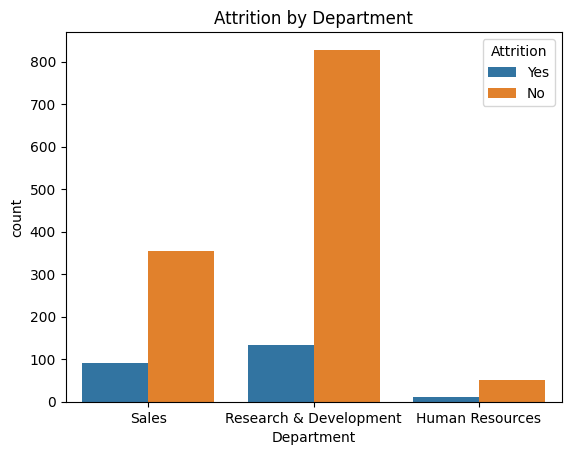

In [ ]:
sns.countplot(data=df, x="Department", hue="Attrition")
plt.title("Attrition by Department")
plt.show()


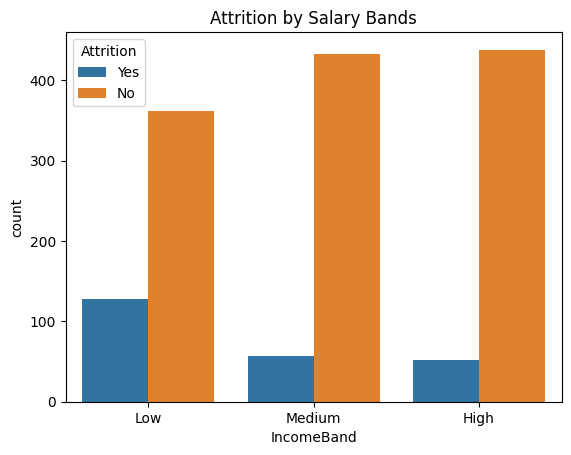

In [ ]:
df["IncomeBand"] = pd.qcut(df["MonthlyIncome"], q=3, labels=["Low","Medium","High"])
sns.countplot(data=df, x="IncomeBand", hue="Attrition")
plt.title("Attrition by Salary Bands")
plt.show()

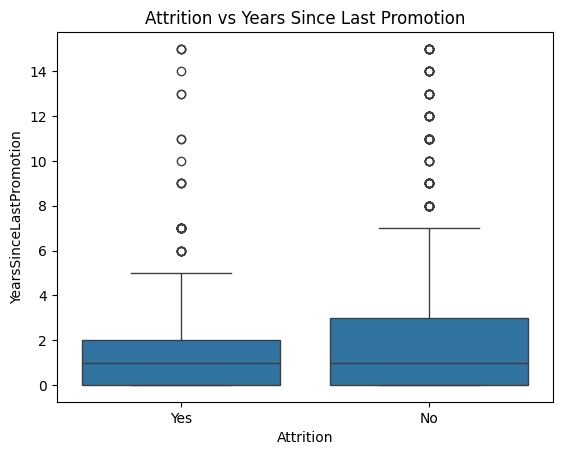

In [ ]:
sns.boxplot(data=df, x="Attrition", y="YearsSinceLastPromotion")
plt.title("Attrition vs Years Since Last Promotion")
plt.show()

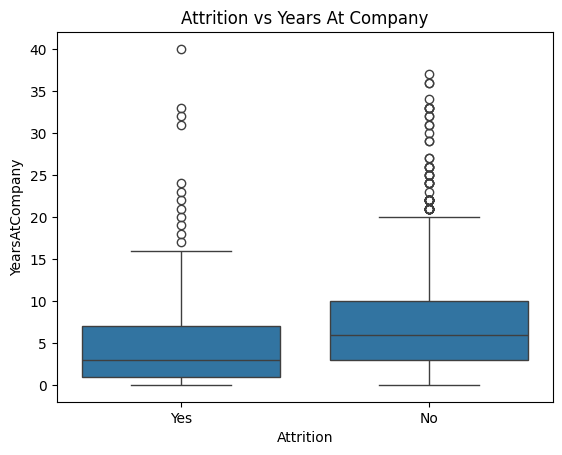

In [ ]:
sns.boxplot(data=df, x="Attrition", y="YearsAtCompany")
plt.title("Attrition vs Years At Company")
plt.show()

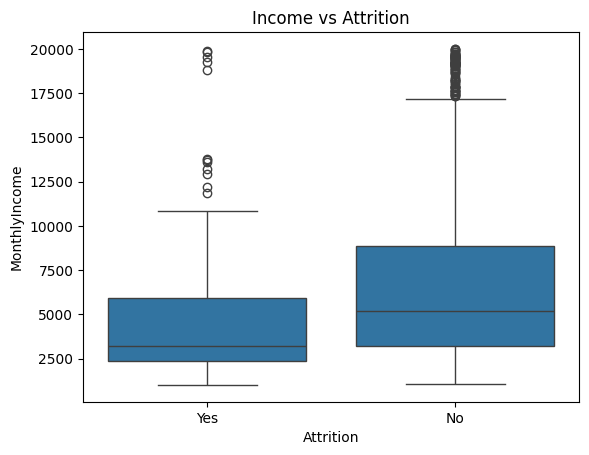

In [ ]:
sns.boxplot(data=df, x="Attrition", y="MonthlyIncome")
plt.title("Income vs Attrition")
plt.show()

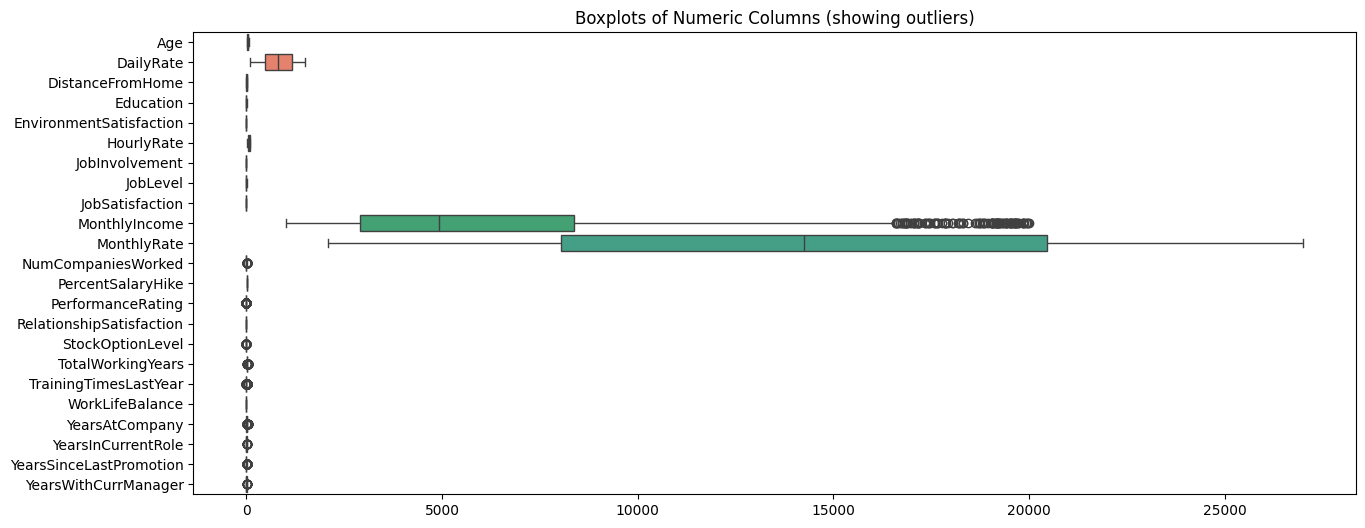

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 6))
sns.boxplot(data=df[numeric_cols], orient='h')
plt.title("Boxplots of Numeric Columns (showing outliers)")
plt.show()

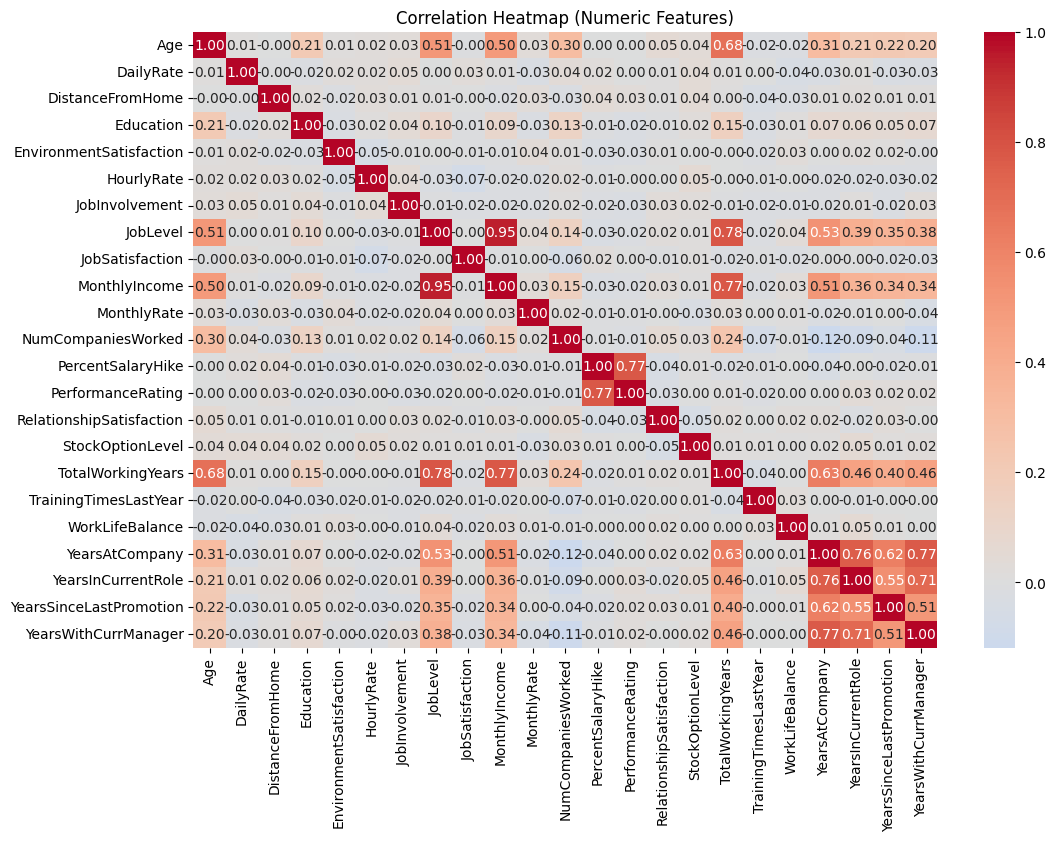

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=True, fmt=".2f", center=0)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

<h1><b> Feature Engineering</b></h1>


In [ ]:
# Create CompanyExperienceRatio Feature
df["CompanyExperienceRatio"] = df["YearsAtCompany"] / df["TotalWorkingYears"].replace(0,1)

In [ ]:
# Create PromotionGap Feature
df["PromotionGap"] = df["YearsSinceLastPromotion"] / df["YearsAtCompany"].replace(0,1)

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,IncomeBand,CompanyExperienceRatio,PromotionGap
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,8,0,1,6,4,0,5,Medium,0.750000,0.000
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,10,3,3,10,7,1,7,Medium,1.000000,0.100
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,7,3,3,0,0,0,0,Low,0.000000,0.000
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,8,3,3,8,7,3,0,Low,1.000000,0.375
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,6,3,3,2,2,2,2,Low,0.333333,1.000


<h1><b> Data Modelling </b></h1>

In [ ]:
print(df["Attrition"].unique())
print(df["Attrition"].value_counts())


['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64


In [ ]:
df_no_outliers = df.copy()   # For Random Forest
df_logistic = df.copy()      # For Logistic Regression

for d in [df_no_outliers, df_logistic]:
    d["Attrition"] = d["Attrition"].map({"Yes": 1, "No": 0})

# Handle outliers in df_logistic only
for col in df_logistic.select_dtypes(include=['int64', 'float64']).columns:
    if col == "Attrition":
        continue
    Q1 = df_logistic[col].quantile(0.25)
    Q3 = df_logistic[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_logistic[col] = np.where(df_logistic[col] < lower_bound, lower_bound,
                                np.where(df_logistic[col] > upper_bound, upper_bound, df_logistic[col]))


In [ ]:
X_log = df_logistic.drop("Attrition", axis=1)
y_log = df_logistic["Attrition"]

In [ ]:
cat_cols = X_log.select_dtypes(include=["object", "category"]).columns
X_log = pd.get_dummies(X_log, columns=cat_cols, drop_first=True)

In [ ]:
# Train-test split
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_log, y_log, test_size=0.2, random_state=42, stratify=y_log
)


In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_log = scaler.fit_transform(X_train_log)
X_test_log = scaler.transform(X_test_log)

<h3>Fit Logistic Regression Model</h3>

In [ ]:
log_reg_model = LogisticRegression(max_iter=1000, random_state=42,verbose=1)
log_reg_model.fit(X_train_log, y_train_log)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=1000, random_state=42, verbose=1)

<h3>Predict Logistic Regression Model</h3>

In [ ]:
y_pred = log_reg_model.predict(X_test_log)
y_proba = log_reg_model.predict_proba(X_test_log)[:,1]

<h3>Evaluation</h3>

In [ ]:
acc = accuracy_score(y_test_log, y_pred)
print(f"Logistic Regression Accuracy: {acc:.4f}\n")
print("Classification Report:\n", classification_report(y_test_log, y_pred))


Logistic Regression Accuracy: 0.8707

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.93       247
           1       0.66      0.40      0.50        47

    accuracy                           0.87       294
   macro avg       0.77      0.68      0.71       294
weighted avg       0.86      0.87      0.86       294



<h3>Confusion Matrix Heatmap</h3>

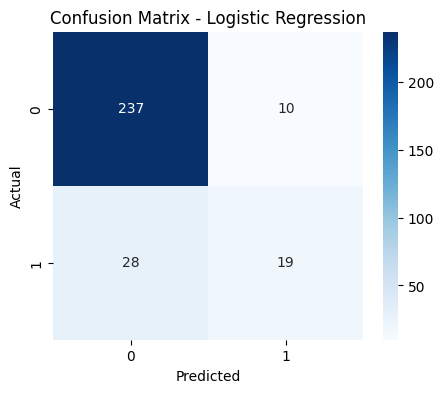

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test_log, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<h3>ROC Curve</h3>

Logistic Regression AUC: 0.8083


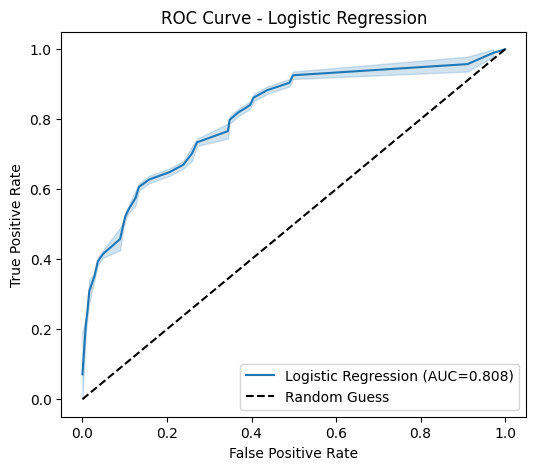

In [ ]:
fpr_log, tpr_log, _ = roc_curve(y_test_log, y_proba)
auc_log = roc_auc_score(y_test_log, y_proba)
print(f"Logistic Regression AUC: {auc_log:.4f}")

roc_df_log = pd.DataFrame({'FPR': fpr_log, 'TPR': tpr_log})

plt.figure(figsize=(6,5))
sns.lineplot(data=roc_df_log, x='FPR', y='TPR', label=f'Logistic Regression (AUC={auc_log:.3f})')
plt.plot([0,1], [0,1], 'k--', label='Random Guess')
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

<h3>Root Mean Square Error</h3>

In [ ]:
rmse_log = np.sqrt(mean_squared_error(y_test_log, y_proba))
print(f"Logistic Regression RMSE: {rmse_log:.4f}")

Logistic Regression RMSE: 0.3181


<h3>Fit Random Forest Classifier Model</h3>

In [ ]:
X_rf = df_no_outliers.drop("Attrition", axis=1)
y_rf = df_no_outliers["Attrition"]

In [ ]:
cat_cols = X_rf.select_dtypes(include=["object", "category"]).columns
X_rf = pd.get_dummies(X_rf, columns=cat_cols, drop_first=True)

In [ ]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_rf, y_rf, test_size=0.2, random_state=42, stratify=y_rf
)

In [ ]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced',
    max_depth=None
)
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

<h3>Predict Random Forest Classifier Model</h3>

In [ ]:
y_pred_rf = rf.predict(X_test_rf)
y_prob_rf = rf.predict_proba(X_test_rf)[:, 1]

<h3>Evaluation</h3>

In [ ]:
acc_rf = accuracy_score(y_test_rf, y_pred_rf)
print(f"Random Forest Accuracy: {acc_rf:.4f}\n")
print("Classification Report:\n", classification_report(y_test_rf, y_pred_rf))


Random Forest Accuracy: 0.8401

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.50      0.09      0.15        47

    accuracy                           0.84       294
   macro avg       0.67      0.53      0.53       294
weighted avg       0.79      0.84      0.79       294



<h3>Confusion Matrix Heatmap</h3>

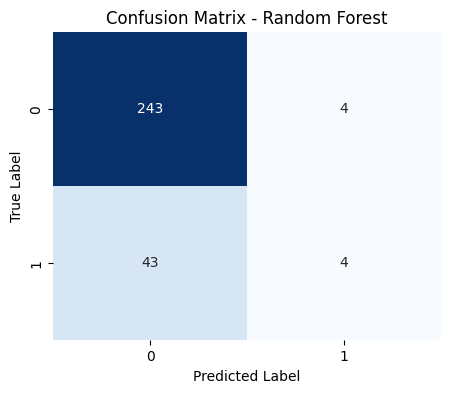

In [ ]:
cm = confusion_matrix(y_test_rf, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<h3>ROC Curve</h3>

Random Forest AUC: 0.7665


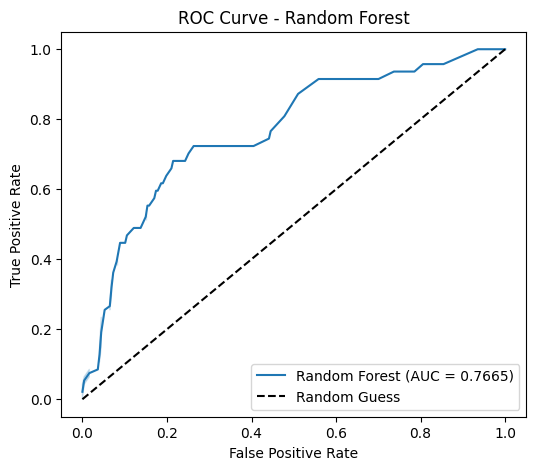

In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(y_test_rf, y_prob_rf)
auc_rf = roc_auc_score(y_test_rf, y_prob_rf)
roc_df = pd.DataFrame({'FPR': fpr_rf, 'TPR': tpr_rf})
print(f"Random Forest AUC: {auc_rf:.4f}")

plt.figure(figsize=(6,5))
sns.lineplot(data=roc_df, x='FPR', y='TPR', label=f"Random Forest (AUC = {auc_rf:.4f})")
plt.plot([0,1], [0,1], 'k--', label='Random Guess')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

<h3>Root Mean Square Error</h3>

In [ ]:
rmse_rf = np.sqrt(mean_squared_error(y_test_rf, y_prob_rf))
print(f"Random Forest RMSE: {rmse_rf:.4f}")

Random Forest RMSE: 0.3420


<h3>Feature Importance</h3>

/tmp/ipython-input-1407409793.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp.values, y=feat_imp.index, palette='viridis')


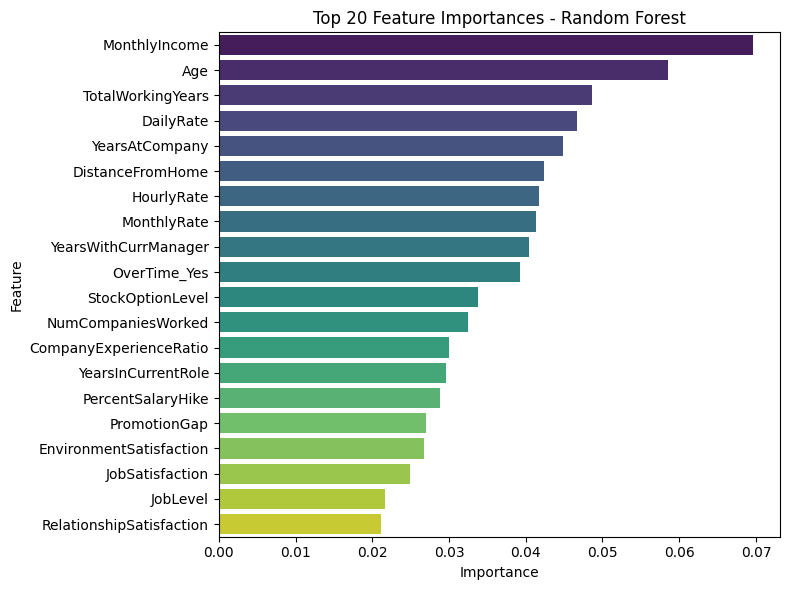

In [ ]:
if hasattr(X_rf, "columns"):
    feat_names = X_rf.columns
else:
    feat_names = [f"f{i}" for i in range(X_train.shape[1])]

importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False).head(20)

plt.figure(figsize=(8,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index, palette='viridis')
plt.title("Top 20 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


<h1>COMPARISON</h1>

In [ ]:
acc_log = accuracy_score(y_test_log, y_pred)
f1_log = f1_score(y_test_log, y_pred)
prec_log = precision_score(y_test_log, y_pred)
rec_log = recall_score(y_test_log, y_pred)

acc_rf = accuracy_score(y_test_rf, y_pred_rf)
f1_rf = f1_score(y_test_rf, y_pred_rf)
prec_rf = precision_score(y_test_rf, y_pred_rf)
rec_rf = recall_score(y_test_rf, y_pred_rf)

print(f"LogReg - Acc:{acc_log:.3f}, F1:{f1_log:.3f}, Prec:{prec_log:.3f}, Rec:{rec_log:.3f}")
print(f"RandomForest - Acc:{acc_rf:.3f}, F1:{f1_rf:.3f}, Prec:{prec_rf:.3f}, Rec:{rec_rf:.3f}")

LogReg - Acc:0.871, F1:0.500, Prec:0.655, Rec:0.404
RandomForest - Acc:0.840, F1:0.145, Prec:0.500, Rec:0.085


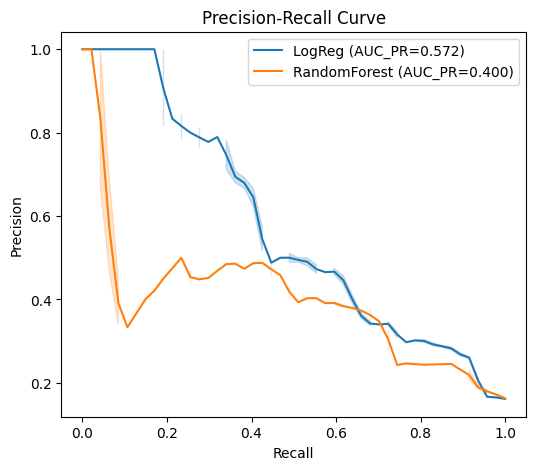

In [ ]:
prec_log, rec_log, _ = precision_recall_curve(y_test_log, y_proba)
auc_pr_log = auc(rec_log, prec_log)

prec_rf, rec_rf, _ = precision_recall_curve(y_test_rf, y_prob_rf)
auc_pr_rf = auc(rec_rf, prec_rf)

plt.figure(figsize=(6,5))
sns.lineplot(x=rec_log, y=prec_log, label=f'LogReg (AUC_PR={auc_pr_log:.3f})')
sns.lineplot(x=rec_rf, y=prec_rf, label=f'RandomForest (AUC_PR={auc_pr_rf:.3f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

In [ ]:
auc_log = roc_auc_score(y_test_log, y_proba)
print(f"Logistic Regression AUC: {auc_log:.4f}")
print(f"Random Forest AUC: {auc_rf:.4f}")


Logistic Regression AUC: 0.8083
Random Forest AUC: 0.7665


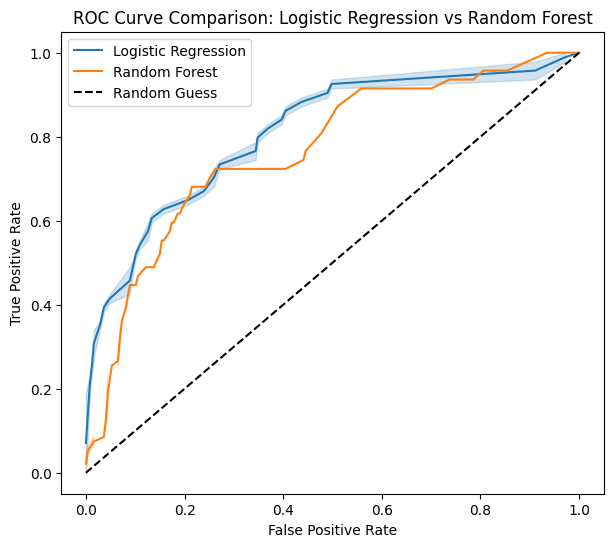

In [ ]:
roc_df_log = pd.DataFrame({'FPR': fpr_log, 'TPR': tpr_log, 'Model': 'Logistic Regression'})
roc_df_rf = pd.DataFrame({'FPR': fpr_rf, 'TPR': tpr_rf, 'Model': 'Random Forest'})
roc_df = pd.concat([roc_df_log, roc_df_rf])

plt.figure(figsize=(7,6))
sns.lineplot(data=roc_df, x='FPR', y='TPR', hue='Model')
plt.plot([0,1], [0,1], 'k--', label='Random Guess')
plt.title("ROC Curve Comparison: Logistic Regression vs Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [ ]:
print(f"Logistic Regression RMSE: {rmse_log:.4f}")
print(f"Random Forest RMSE: {rmse_rf:.4f}")

rmse_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "RMSE": [rmse_log, rmse_rf]
})

Logistic Regression RMSE: 0.3181
Random Forest RMSE: 0.3420
